# test area

### load

In [1]:
from pathlib import Path
import os
import seaborn as sb
import pandas as pd
import sys
import numpy as np
# from datetime import datetime
# from connection_helper import sql

from pandas_plots import tbl, pls, ven , hlp
import duckdb as ddb

hlp.show_package_version(["matplotlib_venn", "dataframe_image", "plotly", "kaleido", "seaborn"], )
df = sb.load_dataset('taxis')
os.environ['THEME'] = 'dark'

dir_db=Path("C://temp") if hlp.get_os(hlp.OperatingSystem.WINDOWS) else Path(os.path.expanduser("~/tmp"))

file_db_clin = dir_db/'workflow/2025-06-24_data_clin.duckdb'

if not file_db_clin.is_file():
    print(f"File does not exist: {file_db_clin}")
    raise FileNotFoundError

print(hlp.get_os(hlp.OperatingSystem.MAC))

🐍 3.12.9 | 📦 matplotlib_venn: 0.11.10 | 📦 dataframe_image: 0.2.7 | 📦 plotly: 6.2.0 | 📦 kaleido: 1.0.0 | 📦 seaborn: 0.13.2 | 📦 pandas: 2.3.1 | 📦 numpy: 1.26.4 | 📦 duckdb: 1.3.2 | 📦 pandas-plots: 0.16.5 | 📦 connection-helper: 0.12
True


In [2]:
con = ddb.connect(file_db_clin, read_only=True)

In [3]:
db_delay = con.sql("""--sql
    select
            first(z_kkr_label) as z_kkr_label,
            first(z_first_treatment_after_days) as z_first_treatment_after_days, 
            first(z_first_treatment) as z_first_treatment
    from Tumor
    where ifnull(z_first_treatment,'') <> ''
    and z_dy = 2023 and z_icd10_3d = 'C81'
    group by z_tum_id
    """)

## pls

### bars

In [83]:
_ = pls.plot_bars(
    db_delay.to_df().iloc[:,:2],
    # height=400,
    # width=1000,
    # use_ci=True,
    # ci_agg='median',
)
_ = pls.plot_bars(
    db_delay.to_df().iloc[:,:2],
    height=600,
    use_ci=True,
    ci_agg='median',
)

In [84]:
pls.plot_stacked_bars(
    db_delay.to_df().iloc[:,[0,2,1]].dropna(),
    height=600,
    # width=1000,
    orientation="h",
    relative=True,
    show_pct_bar=True,
    # renderer="png",
    )

,z_dy,tu,z_kkr_label,cnt
0,2020,06,13-MV,1
1,2020,30,13-MV,1
2,2020,###,13-MV,21
3,2020,18,11-BE,1
4,2020,18.,13-MV,1
...,...,...,...,...
16352,2023,S37,14-SN,1
16353,2023,S72,11-BE,1
16354,2023,Z22,14-SN,1
16355,2023,Z85,14-SN,1


z_dy            int64
tu             object
z_kkr_label    object
cnt             int64
dtype: object


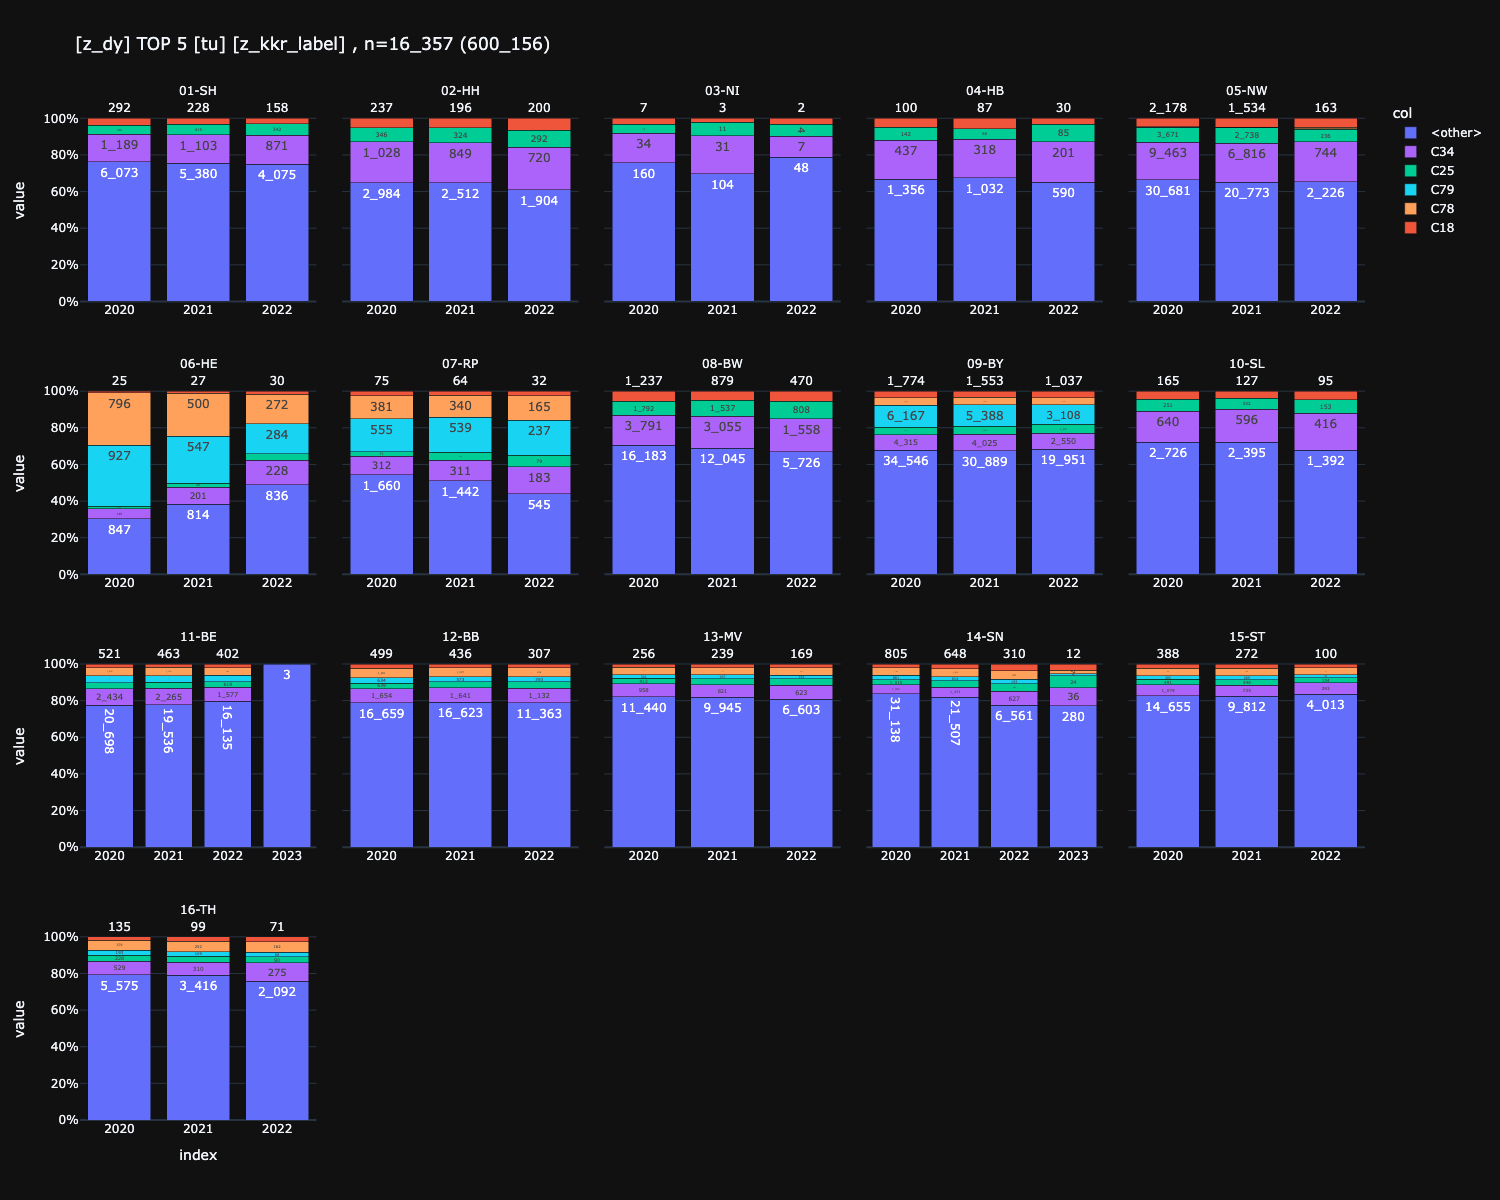

In [85]:
df_facets = pd.read_csv("assets/facets.csv", sep=";")#.astype({"z_dy": "Int64"}).astype({"z_dy": str})
display(df_facets[:None])
print(df_facets.dtypes)

_df = df_facets[
    [
        "z_dy",
        "tu",
        "z_kkr_label",
        "cnt",
    ]
]#[:100]
# _df


l=pls.plot_facet_stacked_bars(
    _df,
    top_n_color=5,
    # subplots_per_row=3,
    # top_n_facet=15,
    # top_n_index=3, 
    show_other=True,
    sort_values_color=True,
    # sort_values_facet=True,
    relative=True,
    # show_pct=True,
    annotations=True,
    subplot_size=300,
    subplots_per_row=5,
    # renderer="",
    # show_pct=True,
    )
# l

# ll = pls.plot_facet_stacked_bars(
#     _df,
#     top_n_color=5,
#     # subplots_per_row=8,
#     # top_n_facet=15,
#     # top_n_index=3, 
#     show_other=True,
#     sort_values_color=True,
#     # sort_values_facet=True,
#     relative=True,
#     annotations=True,
#     )
# # ll

### histo

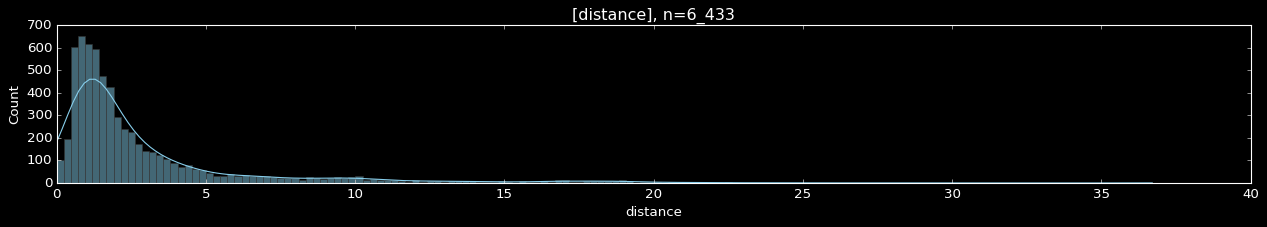

distance -> min: 0.0 | lower: 0.0 | q25: 0.98 | median: 1.64 | mean: 3.025 | q75: 3.21 | upper: 6.555 | max: 36.7 | std: 3.828 | cv: 1.266 | sum: 19_457.36 | skew: 3.008 | kurto: 11.135  


In [86]:
_=pls.plot_histogram_large(
    df.distance,
    # nbins=50,
    height=300,
    summary=True
)

In [87]:
# _df = df["distance"]
# # _df#.to_frame()
# # _df=df[["fare","distance"]]
# pls.plot_histogram(
#     _df,
#     height=300,
#     width=1000,
#     precision=0,
#     orientation="v",
#     histnorm="",
#     nbins=-1,
#     # barmode="overlay",
#     # renderer="png",
#     # png_path=Path(".local/box5.png"),
#     summary=True,
#     caption="test lol xd-lmao",
# )

### box

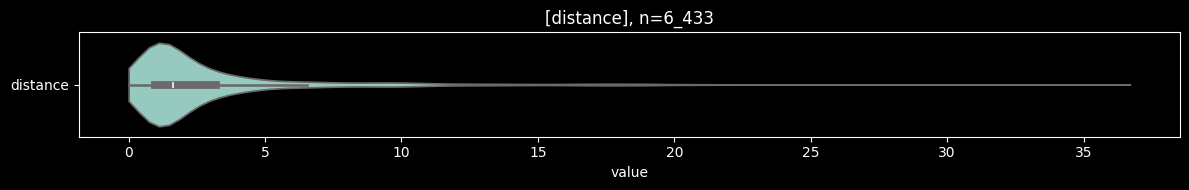

distance -> min: 0.0 | lower: 0.0 | q25: 0.98 | median: 1.64 | mean: 3.025 | q75: 3.21 | upper: 6.555 | max: 36.7 | std: 3.828 | cv: 1.266 | sum: 19_457.36 | skew: 3.008 | kurto: 11.135  


In [88]:
_=pls.plot_box_large(
    df["distance"],
    height=200,
    violin=True,
    # use_log=True,
)

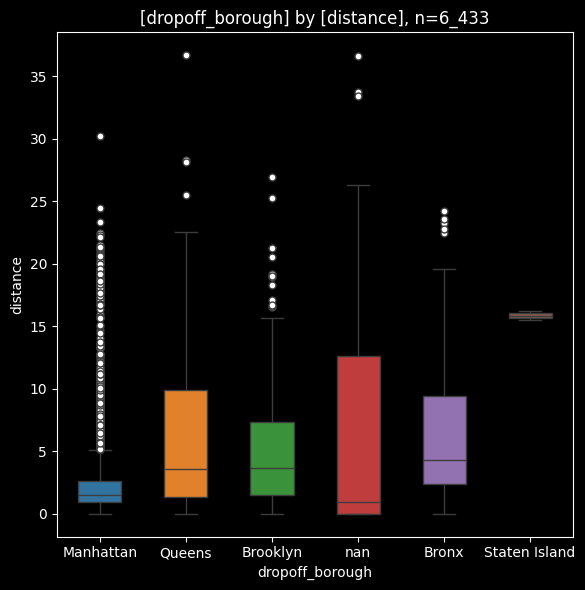

🟧 all data
distance -> min: 0.0 | lower: 0.0 | q25: 0.98 | median: 1.64 | mean: 3.02 | q75: 3.21 | upper: 6.56 | max: 36.7 | std: 3.83 | cv: 1.27 | sum: 19_457.36 | skew: 3.01 | kurto: 11.13  
🟧 boxes
Bronx -> min: 0.0 | lower: 0.0 | q25: 2.36 | median: 4.31 | mean: 6.61 | q75: 9.44 | upper: 20.06 | max: 24.2 | std: 5.95 | cv: 0.9 | sum: 905.88 | skew: 1.3 | kurto: 0.88  
Brooklyn -> min: 0.0 | lower: 0.0 | q25: 1.53 | median: 3.63 | mean: 5.03 | q75: 7.3 | upper: 15.95 | max: 26.92 | std: 4.49 | cv: 0.89 | sum: 2_519.28 | skew: 1.42 | kurto: 2.23  
Manhattan -> min: 0.0 | lower: 0.0 | q25: 0.91 | median: 1.5 | mean: 2.39 | q75: 2.6 | upper: 5.14 | max: 30.23 | std: 2.91 | cv: 1.21 | sum: 12_447.68 | skew: 3.74 | kurto: 17.39  
Queens -> min: 0.0 | lower: 0.0 | q25: 1.34 | median: 3.56 | mean: 5.96 | q75: 9.89 | upper: 22.72 | max: 36.7 | std: 5.89 | cv: 0.99 | sum: 3_230.13 | skew: 1.29 | kurto: 1.5  
Staten Island -> min: 15.51 | lower: 15.51 | q25: 15.68 | median: 15.86 | mean: 15.8

In [89]:
_=pls.plot_boxes_large(
    df[["dropoff_borough","distance"]],
    width=600,
    # violin=True,
    # use_log=True,
)

In [90]:
# pls.plot_box(
#     df.distance,
#     height=400,
#     violin=False,
#     x_min=-2,
#     x_max=50,
#     # summary = False
# )

# _df = df[["dropoff_borough", "distance"]]
# # _df["dropoff_borough"] = _df["dropoff_borough"].astype(str)
# display(_df.dtypes)
# display(_df)
# _=pls.plot_boxes(
#     _df,
#     width=1600,
#     annotations=False,
#     precision=4,
# )

### pie

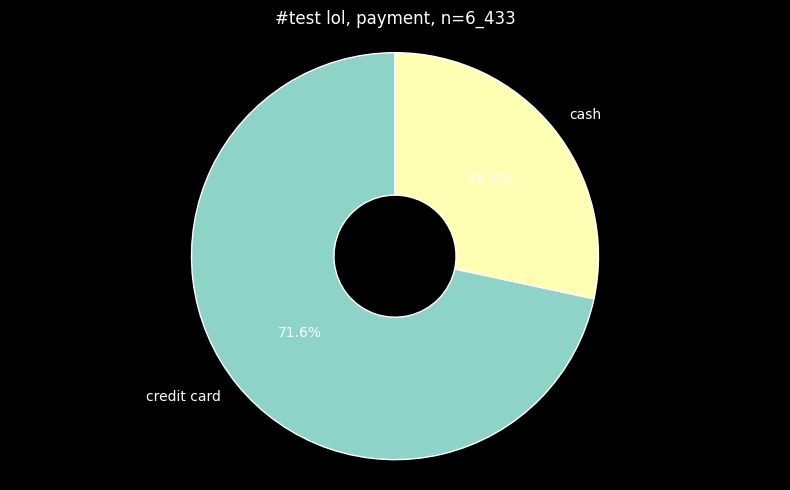

In [91]:
df["payment"]
pls.plot_pie(
    data=df["payment"],
    caption="test lol",
    donut_size=0.3,
    # precision=3,
)

### join

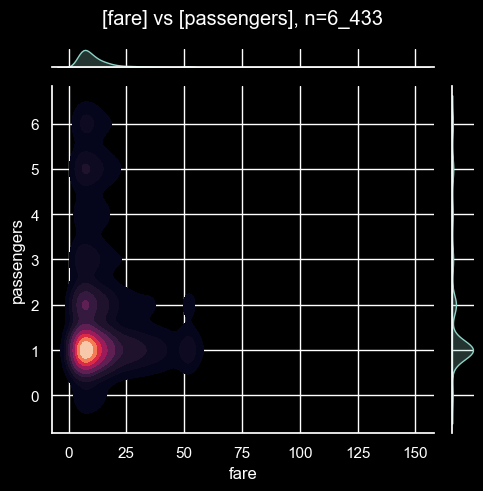

In [92]:
_df = df[["fare", "passengers"]]
# pls.plot_joint(_df, precision=0, size=15, kind="reg", caption="")
# pls.plot_joint(_df, precision=0, size=15, kind="hex", png_path=Path(".local/box6.png"))
pls.plot_joint(_df, precision=0, size=5, kind="kde",)
# pls.plot_joint(_df, precision=0, size=5, kind="hist",)
# pls.plot_joint(_df, precision=0, size=5, kind="kde", png_path=Path(".local/box7.png"))

### sankey

In [93]:
pls.plot_sankey(
    width=2000,
    font_size=15,
    # renderer="png",
)

--- Using demo data (data_demo) ---
  tumor-id diagnosis date treatment
0        1     2020-01-01        op
1        1     2021-02-01      syst
2        1     2022-03-01        op
3        1     2023-04-01       rad
4        1     2024-05-01        op
-----------------------------------


## tbl

### describe_df()

In [ ]:
df["lol"] = np.nan
tbl.describe_df(
    df#.assign(lol = np.nan),
    ,"taxis",
    # use_columns=False,
    # renderer="svg",
)

🔵 *** df: taxis ***  
🟣 shape: (6_433, 15) columns: ['pickup' 'dropoff' 'passengers' 'distance' 'fare' 'tip' 'tolls' 'total'
 'color' 'payment' 'pickup_zone' 'dropoff_zone' 'pickup_borough'
 'dropoff_borough' 'lol']  
🟣 duplicates: 0  
🟣 uniques: [{pickup: 6_414 dropoff: 6_425 passengers: 7 distance: 1_079 fare: 220 tip: 489 tolls:  
16 total: 898 color: 2 payment: 2 pickup_zone: 194 dropoff_zone: 203 pickup_borough:  
4 dropoff_borough: 5 lol: 1}]  
🟣 missings: [{pickup: 0 dropoff: 0 passengers: 0 distance: 0 fare: 0 tip: 0 tolls: 0 total: 0 color:  
0 payment: 44 pickup_zone: 26 dropoff_zone: 45 pickup_borough: 26 dropoff_borough:  
45 lol: 0}]  
--- column uniques (all)  
🟠 index [0, 1, 2, 3, 4,]  
🟠 pickup(6_414|datetime64[ns])   [2019-02-28 23:29:03, 2019-03-01 00:03:29, 2019-03-01 00:08:32, 2019-03-01 00:15:53,  
2019-03-01 00:29:22,]  
🟠 dropoff(6_425|datetime64[ns])   [2019-02-28 23:32:35, 2019-03-01 00:13:32, 2019-03-01 00:29:47, 2019-03-01 00:32:48,  
2019-03-01 00:37:39,]  


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,lol
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,nan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,nan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,nan


### descr_db()

In [95]:
tbl.descr_db(db_delay, caption="delay",)

🗄️ delay	1_687, 3
	("z_kkr_label, z_first_treatment_after_days, z_first_treatment")
┌─────────────┬──────────────────────────────┬───────────────────┐
│ z_kkr_label │ z_first_treatment_after_days │ z_first_treatment │
│   varchar   │            int32             │      varchar      │
├─────────────┼──────────────────────────────┼───────────────────┤
│ 14-SN       │                           58 │ sy                │
│ 09-BY       │                           36 │ sy                │
│ 05-NW       │                           13 │ op                │
└─────────────┴──────────────────────────────┴───────────────────┘



In [96]:
df_dsich = pd.read_csv("assets/dsich.csv", sep=";")#.astype({"z_dy": "Int64"}).astype({"z_dy": str})
display(df_dsich[:3])
# print(df_dsich.dtypes)

,id,bl,label,cnt
0,0,01-SH,7 - Histologie Primärtumor,14351
1,22,01-SH,3 - Todesbescheinigung (DCO),1004
2,23,01-SH,5 - Zytologie,146


In [97]:
_df = df_dsich[
    [
        "bl",
        "label",
        "cnt",
    ]
].sort_values("bl")

_ = pls.plot_stacked_bars(
    _df,
    # swap=True,
    orientation="h",
    # show_total=True,
    # normalize=True,
    # relative=True,
    # height=1000,
    # top_n_color=5,
    # sort_values_index=True,
    sort_values_color=True,
    # top_n_index=3,
    # precision=2,
    # show_other=True,
    # top_n_index=2,
)
_

In [98]:
_df = df_facets[
    [
        "z_kkr_label",
        "z_dy",
        "cnt",
    ]
]#.astype({"z_dy": str})

_ = pls.plot_stacked_bars(
    _df,
    # swap=True,
    orientation="h",
    # show_total=True,
    # normalize=True,
    # relative=True,
    height=1000,
    top_n_color=10,
    # sort_values_index=True,
    # sort_values_color=True,
    # top_n_index=5,
    # precision=2,
    # show_other=True,
    # top_n_index=2,
    # renderer="png",
)
_

In [99]:
_df = df_facets[
    [
        "z_kkr_label",
        "cnt",
    ]
]
_df

_ = pls.plot_bars(
    _df,
    height=600,
    width=1200,
    sort_values=True,
    # renderer="png",
)

In [100]:
_df = df[["color","payment","pickup_borough","total"]]
_df
# _=pls.plot_stacked_bars(_df[["color","payment","total"]],)
tbl.describe_df(_df, "taxis")

🔵 *** df: taxis ***  
🟣 shape: (6_433, 4) columns: ['color' 'payment' 'pickup_borough' 'total']  
🟣 duplicates: 4_803  
🟣 uniques: [{color: 2 payment: 2 pickup_borough: 4 total: 898}]  
🟣 missings: [{color: 0 payment: 44 pickup_borough: 26 total: 0}]  
--- column uniques (all)  
🟠 index [0, 1, 2, 3, 4,]  
🟠 color(2|object)   ['green', 'yellow',]  
🟠 payment(3|object)   ['<NA>', 'cash', 'credit card',]  
🟠 pickup_borough(5|object)   ['<NA>', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',]  
🟠 total(898|float64)   [1.3, 3.3, 3.31, 3.8, 4.3,]  
--- column stats (numeric)  
total -> min: 1.3 | lower: 1.3 | q25: 10.8 | median: 14.16 | mean: 18.518 | q75: 20.3 | upper: 34.55 | max: 174.82 | std: 13.816 | cv: 0.746 | sum: 119_124.97 | skew: 3.093 | kurto: 15.053  


,color,payment,pickup_borough,total
0,yellow,credit card,Manhattan,12.95
1,yellow,cash,Manhattan,9.30
2,yellow,credit card,Manhattan,14.16


In [101]:
db = con.from_df(df)
tbl.descr_db(db, caption="taxis",)

🗄️ taxis	6_433, 14
	("pickup, dropoff, passengers, distance, fare, tip, tolls, total, color, payment, pickup_zone, dropoff_zone, pickup_borough, dropoff_borough")
┌─────────────────────┬─────────────────────┬────────────┬──────────┬────────┬────────┬────────┬────────┬─────────┬─────────────┬───────────────────────┬───────────────────────┬────────────────┬─────────────────┐
│       pickup        │       dropoff       │ passengers │ distance │  fare  │  tip   │ tolls  │ total  │  color  │   payment   │      pickup_zone      │     dropoff_zone      │ pickup_borough │ dropoff_borough │
│    timestamp_ns     │    timestamp_ns     │   int64    │  double  │ double │ double │ double │ double │ varchar │   varchar   │        varchar        │        varchar        │    varchar     │     varchar     │
├─────────────────────┼─────────────────────┼────────────┼──────────┼────────┼────────┼────────┼────────┼─────────┼─────────────┼───────────────────────┼───────────────────────┼────────────────┼────

## show num

In [102]:
from pathlib import Path

_df=df.pivot_table(index="color", columns="payment", values="fare", aggfunc="sum", dropna=False)
tbl.show_num_df(
    _df,
    total_mode="sum",
    total_axis="y",
    data_bar_axis="",
    pct_axis="xy",
    precision=0,
    heatmap_axis="xy",
    # kpi_mode="max_min_x",
    total_exclude=True,
    # kpi_mode="min_max_xy",
    kpi_mode="rag_abs",
    kpi_rag_list=(100, 1000),
    # swap=True,
    font_size_td=12,
    font_size_th=14,
    # png_path=Path("test.png"),
)

payment,cash,credit card,nan,Total
color,,,,
green,3_995 (4.7%) 🟥,9_774 (11.6%) 🟥,20 (0.0%) 🟩,13_788 (16.4%) 🟥
yellow,17_012 (20.2%) 🟥,52_907 (62.8%) 🟥,508 (0.6%) 🟨,70_427 (83.6%) 🟥


In [103]:
_df=df[["color", "payment", "fare"]]
tbl.pivot_df(
    _df,
    total_mode="sum",
    data_bar_axis="xy",
    pct_axis="xy",
    precision=0,
    heatmap_axis="",
    kpi_mode="max_min_x"
    # kpi_mode="min_max_xy",
    # kpi_mode="rag_abs",
    # kpi_rag_list=(100, 1000),
)

payment,nan,cash,credit card,Total
color,,,,
green,20 (0.0%) 🟥,3_995 (4.7%) 🟥,9_774 (11.6%) 🟥,13_788 (16.4%) 🟥
yellow,508 (0.6%) 🟩,17_012 (20.2%) 🟩,52_907 (62.8%) 🟩,70_427 (83.6%) 🟩
Total,528 (0.6%) ⬛,21_006 (24.9%) ⬛,62_681 (74.4%) ⬛,84_215 (100.0%) ⬛


In [104]:
_df = df[["distance", "fare", "tip", "tolls"]][:5]
tbl.show_num_df(
    _df,
    data_bar_axis="x",
    pct_axis="xy",
    precision=3,
    total_mode="sum",
)
# _df['distance'].mean()

,distance,fare,tip,tolls,Total
0,1.600 (2.0%),7.000 (8.7%),2.150 (2.7%),0,10.750 (13.3%)
1,0.790 (1.0%),5.000 (6.2%),0,0,5.790 (7.2%)
2,1.370 (1.7%),7.500 (9.3%),2.360 (2.9%),0,11.230 (13.9%)
3,7.700 (9.5%),27.000 (33.4%),6.150 (7.6%),0,40.850 (50.5%)
4,2.160 (2.7%),9.000 (11.1%),1.100 (1.4%),0,12.260 (15.2%)
Total,13.620 (16.8%),55.500 (68.6%),11.760 (14.5%),0,80.880 (100.0%)


## venn

ab --> cars1 | cars2 --> len: 7


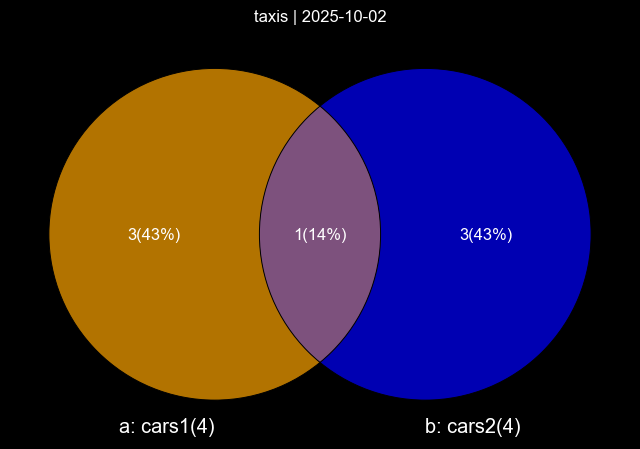

In [105]:
set_a = {'ford','ferrari','mercedes', 'bmw'}
set_b = {'opel','bmw','bentley','audi'}
_df, _details = ven.show_venn2(
    title="taxis",
    a_set=set_a,
    a_label="cars1",
    b_set=set_b,
    b_label="cars2",
    verbose=0,
    size=8,
)

abc --> cars1 | cars2 | cars3 --> len: 11
ab --> cars1 | cars2 --> len: 7
ac --> cars1 | cars3 --> len: 8
bc --> cars2 | cars3 --> len: 9


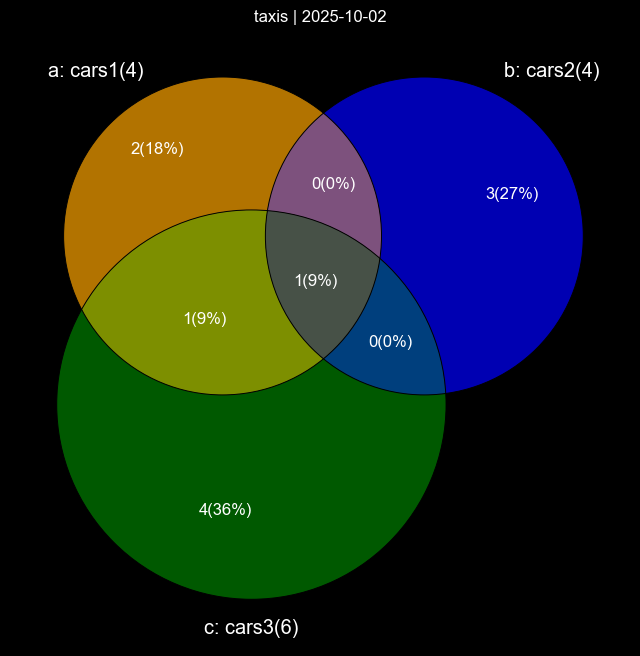

In [106]:
set_a = {'ford','ferrari','mercedes', 'bmw'}
set_b = {'opel','bmw','bentley','audi'}
set_c = {'ferrari','bmw','chrysler','renault','peugeot','fiat'}
_df, _details = ven.show_venn3(
    title="taxis",
    a_set=set_a,
    a_label="cars1",
    b_set=set_b,
    b_label="cars2",
    c_set=set_c,
    c_label="cars3",
    verbose=0,
    size=8,
)

## hlp

In [107]:
df.pickup.to_series()

0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6428   2019-03-31 09:51:53
6429   2019-03-31 17:38:00
6430   2019-03-23 22:55:18
6431   2019-03-04 10:09:25
6432   2019-03-13 19:31:22
Name: pickup, Length: 6433, dtype: datetime64[ns]

In [108]:
hlp.get_tum_details("df6bc655-e0ca-47f1-900c-ff2c749b3c7d", con)

pat
┌──────────────────────────────────────┬─────────┬────────┬─────────┬────────────┬──────────────┬──────────────────────────┬──────────────────┬──────────────────────────────┐
│               z_pat_id               │  z_sex  │ z_age  │ z_ag05  │ Verstorben │ Geburtsdatum │ Geburtsdatum_Genauigkeit │ DatumVitalStatus │ DatumVitalStatus_Genauigkeit │
│               varchar                │ varchar │ double │ varchar │  varchar   │     date     │         varchar          │       date       │           varchar            │
├──────────────────────────────────────┼─────────┼────────┼─────────┼────────────┼──────────────┼──────────────────────────┼──────────────────┼──────────────────────────────┤
│ 450b0462-3c82-411a-ab33-9ed13286a58d │ W       │  83.25 │ a80b84  │ N          │ 1939-12-15   │ T                        │ 2023-06-15       │ T                            │
└──────────────────────────────────────┴─────────┴────────┴─────────┴────────────┴──────────────┴────────────────────────

In [109]:
hlp.add_measures_to_pyg_config(".local/pygwalker_spec_.json", strict=False)

In [110]:
from pandas_plots import hlp
url="https://github.com/robert-koch-institut/Bundesweiter_klinischer_Krebsregisterdatensatz-Datenschema_und_Klassifikationen"
# url="http://google.com"

# hlp.create_barcode_from_url(
#     url=url,
#     output_path=".local/zfkd-repo.png",
#     show_image=True,
# )

In [111]:
hlp.find_cols(df, [
    "Tot",
    "DIS",
    ])


['total', 'distance']

In [112]:
# df
# from pandas_plots import hlp
hlp.add_datetime_columns(df,"dropoff")
# df

⏳ Adding datetime columns basing off of: dropoff


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,dropoff_zone,pickup_borough,dropoff_borough,YYYY,MM,Q,YYYY-MM,YYYYQ,YYYY-WW,DDD
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,...,UN/Turtle Bay South,Manhattan,Manhattan,2019,3,1,2019-03,2019Q1,2019-W12,Sat
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,...,Upper West Side South,Manhattan,Manhattan,2019,3,1,2019-03,2019Q1,2019-W10,Mon
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,...,West Village,Manhattan,Manhattan,2019,3,1,2019-03,2019Q1,2019-W13,Wed
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,...,Yorkville West,Manhattan,Manhattan,2019,3,1,2019-03,2019Q1,2019-W10,Sun
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,...,Yorkville West,Manhattan,Manhattan,2019,3,1,2019-03,2019Q1,2019-W13,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,...,Central Harlem North,Manhattan,Manhattan,2019,3,1,2019-03,2019Q1,2019-W13,Sun
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,...,East Concourse/Concourse Village,Queens,Bronx,2019,3,1,2019-03,2019Q1,2019-W13,Sun
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,...,Bushwick North,Brooklyn,Brooklyn,2019,3,1,2019-03,2019Q1,2019-W12,Sat
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,...,East Flatbush/Remsen Village,Brooklyn,Brooklyn,2019,3,1,2019-03,2019Q1,2019-W10,Mon


In [113]:
lol="""
The most important themes of the draft referendum are:
1. Improving the use of health data for research and innovation, particularly through the establishment of a National Data Access Point;
2. Enhancing the coordination and networking of different stakeholders involved in health data management;
3. Expanding the scope of the General Data Protection Regulation (GDPR) to cover all areas of healthcare;
4. Providing better access to health data for patients and researchers, including through the development of a new law on health data protection;
5. Facilitating the exchange of health data between different countries and regions, particularly within the European Union (EU);
6. Ensuring that data are used in a way that promotes sustainable development and achieves the United Nations' Sustainable Development Goals (SDGs)."""

print(
hlp.wrap_text(
    text=lol,
    # max_items_in_line=40,
    use_sep=True,
    use_apo=True,
)
)

[The most important themes of the draft referendum are:  
1. Improving the use of health data for research and innovation particularly through  
the establishment of a National Data Access Point;  
2. Enhancing the coordination and networking of different stakeholders involved  
in health data management;  
3. Expanding the scope of the General Data Protection Regulation (GDPR) to cover all  
areas of healthcare;  
4. Providing better access to health data for patients and researchers including through  
the development of a new law on health data protection;  
5. Facilitating the exchange of health data between different countries and regions  
particularly within the European Union (EU);  
6. Ensuring that data are used in a way that promotes sustainable development and achieves  
the United Nations Sustainable Development Goals (SDGs).]
